In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [54]:
data = pd.read_csv("C:/Users/20106/Downloads/Mall_Customers.csv")

In [55]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [56]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [57]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [58]:
data = data.drop(columns=['CustomerID'])

Text(0, 0.5, 'Count')

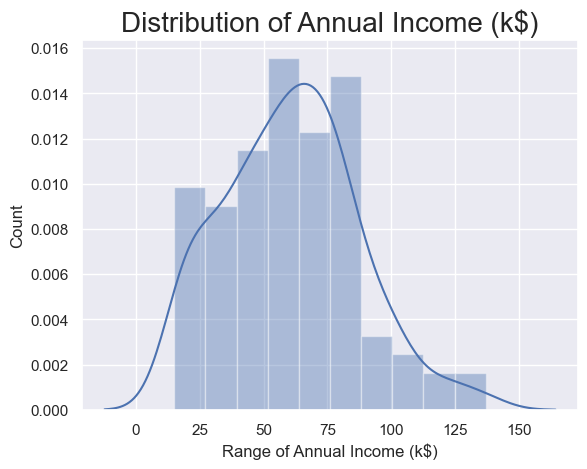

In [59]:
sns.distplot(data['Annual Income (k$)']) 
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)') 
plt.ylabel('Count')

Text(0, 0.5, 'Count')

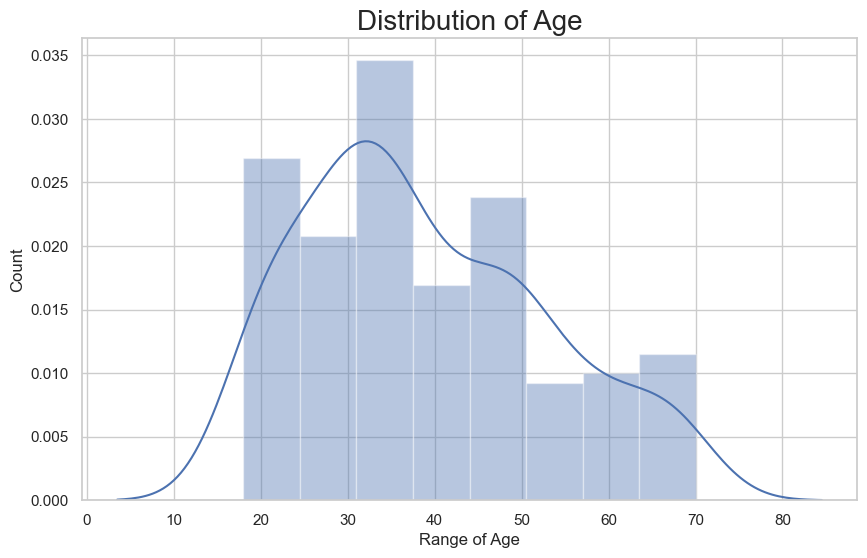

In [60]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid') 
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20) 
plt.xlabel('Range of Age') 
plt.ylabel('Count')

Text(0, 0.5, 'Count')

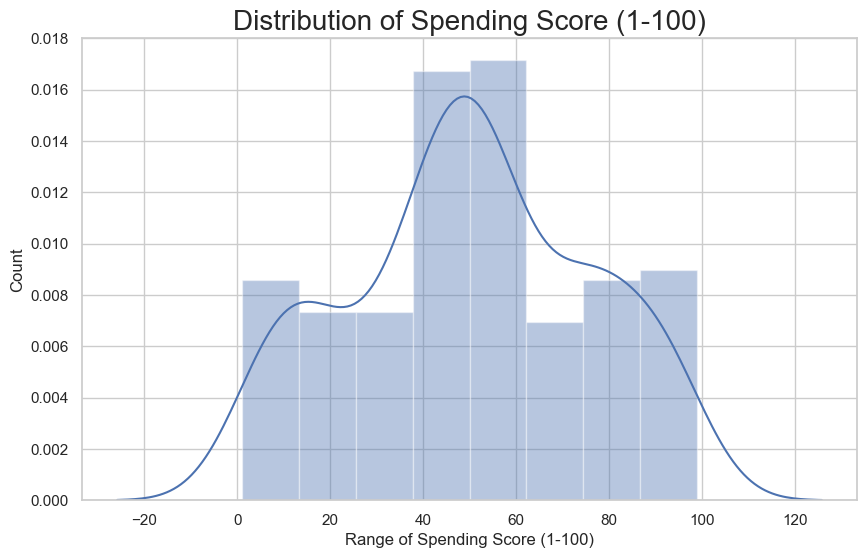

In [61]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)']) 
plt.title('Distribution of Spending Score (1-100)', fontsize =20) 
plt.xlabel('Range of Spending Score (1-100)') 
plt.ylabel('Count')

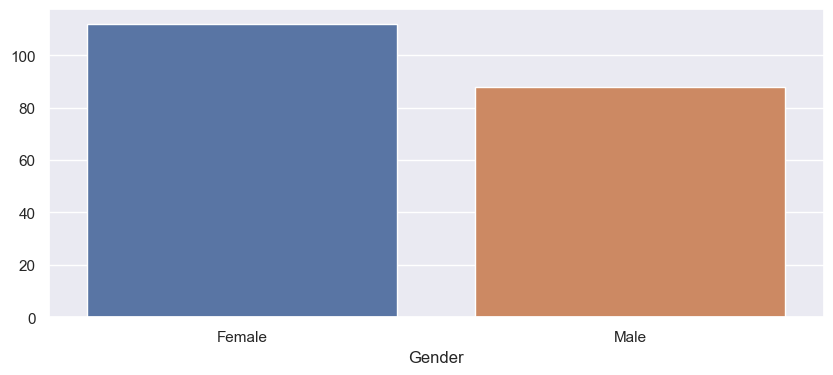

In [62]:
genders = data.Gender.value_counts() 
sns.set_style("darkgrid") 
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values) 
plt.show()

In [63]:
encoder = LabelEncoder()
data['Gender']= encoder.fit_transform(data["Gender"])
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [64]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

outlier_indices = data[outliers].index

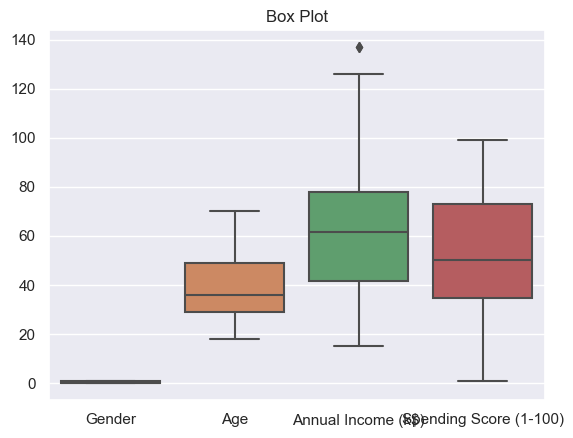

In [65]:
sns.boxplot(data)
plt.title('Box Plot')
plt.show()

In [66]:
clean_data = data.drop(outlier_indices)

clean_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
193,0,38,113,91
194,0,47,120,16
195,0,35,120,79
196,0,45,126,28


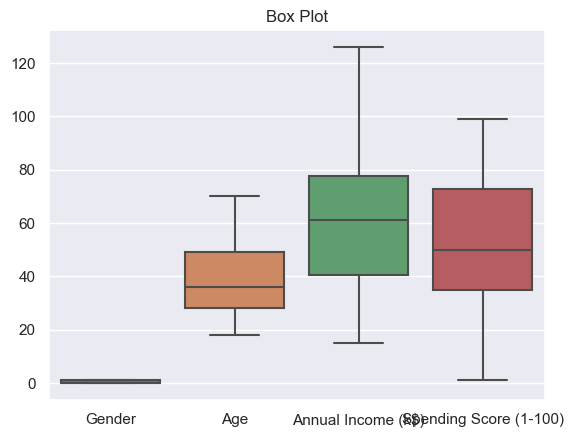

In [67]:
sns.boxplot(clean_data)
plt.title('Box Plot')
plt.show()

In [68]:
scaler = StandardScaler()
clean_data [['Gender','Age','Annual Income (k$)','Spending Score (1-100)']] = scaler.fit_transform(clean_data[['Gender'
                                                                                                                   ,'Age','Annual Income (k$)'
                                                                                                                   ,'Spending Score (1-100)']])

In [69]:
clean_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.141195,-1.425414,-1.779171,-0.435989
1,1.141195,-1.282367,-1.779171,1.199413
2,-0.876275,-1.353890,-1.739447,-1.720949
3,-0.876275,-1.139319,-1.739447,1.043661
4,-0.876275,-0.567131,-1.699723,-0.397051
...,...,...,...,...
193,-0.876275,-0.066466,2.113819,1.588795
194,-0.876275,0.577246,2.391890,-1.331567
195,-0.876275,-0.281037,2.391890,1.121537
196,-0.876275,0.434198,2.630236,-0.864309


In [70]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(clean_data)
clean_data['PCA1'] = pca_components[:, 0]
clean_data['PCA2'] = pca_components[:, 1]


In [71]:
clean_data

,Gender,Age,Annual Income (k$),Spending Score (1-100),PCA1,PCA2
0,1.141195,-1.425414,-1.779171,-0.435989,-0.409677,-0.854725
1,1.141195,-1.282367,-1.779171,1.199413,-1.429194,-0.665974
2,-0.876275,-1.353890,-1.739447,-1.720949,0.019003,-2.031137
3,-0.876275,-1.139319,-1.739447,1.043661,-1.723179,-1.710059
4,-0.876275,-0.567131,-1.699723,-0.397051,-0.345276,-1.894094
...,...,...,...,...,...,...
193,-0.876275,-0.066466,2.113819,1.588795,-1.335255,1.524213
194,-0.876275,0.577246,2.391890,-1.331567,1.104540,1.355478
195,-0.876275,-0.281037,2.391890,1.121537,-1.161548,1.717316
196,-0.876275,0.434198,2.630236,-0.864309,0.688405,1.623719


In [72]:
df1 = clean_data[['PCA1','PCA2']]

df1

,PCA1,PCA2
0,-0.409677,-0.854725
1,-1.429194,-0.665974
2,0.019003,-2.031137
3,-1.723179,-1.710059
4,-0.345276,-1.894094
...,...,...
193,-1.335255,1.524213
194,1.104540,1.355478
195,-1.161548,1.717316
196,0.688405,1.623719


In [73]:
def optimum_k (data,max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel ('Number of clusters')
    plt.ylabel ('inertia')
    plt.grid(True)
    plt.show()

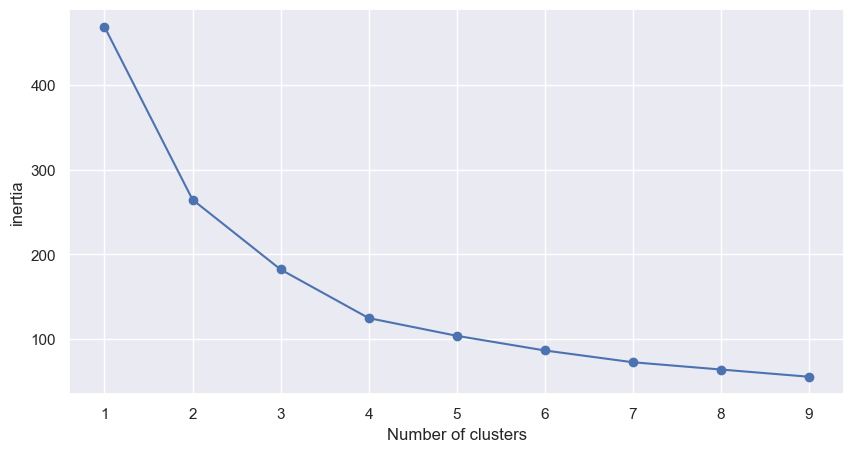

In [74]:
optimum_k(df1,10)

In [75]:
kmeans = KMeans(n_clusters=6,random_state=42)
kmeans.fit(df1)

KMeans(n_clusters=6, random_state=42)

In [76]:
y = kmeans.predict(df1)
df1["label"] = y
df1.head()

,PCA1,PCA2,label
0,-0.409677,-0.854725,2
1,-1.429194,-0.665974,5
2,0.019003,-2.031137,2
3,-1.723179,-1.710059,5
4,-0.345276,-1.894094,2


In [77]:
silhouette_avg = silhouette_score(df1, y)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6163839780043295


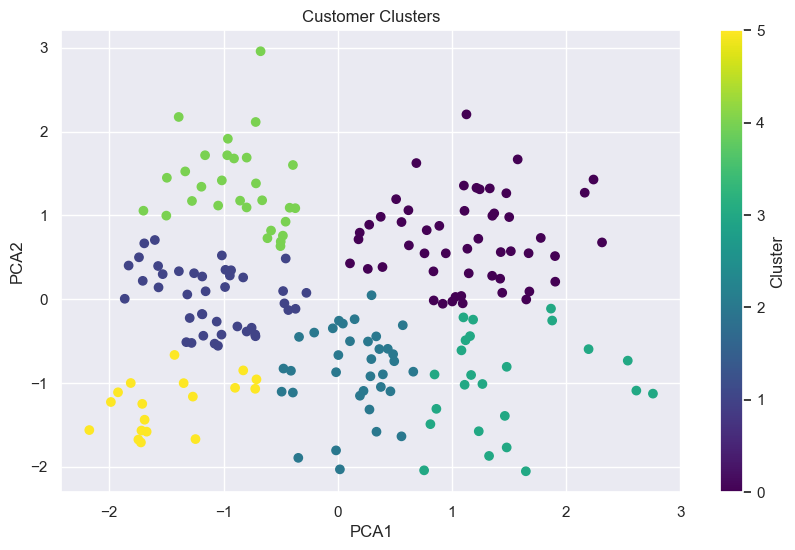

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['PCA1'], clean_data['PCA2'], c=y, cmap='viridis', marker='o')
plt.title('Customer Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

In [79]:
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(df1)

KMeans(n_clusters=5, random_state=42)

In [80]:
y = kmeans.predict(df1)
df1["label"] = y
df1.head()

,PCA1,PCA2,label
0,-0.409677,-0.854725,1
1,-1.429194,-0.665974,3
2,0.019003,-2.031137,1
3,-1.723179,-1.710059,3
4,-0.345276,-1.894094,1


In [81]:
silhouette_avg = silhouette_score(df1, y)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5433394859035513


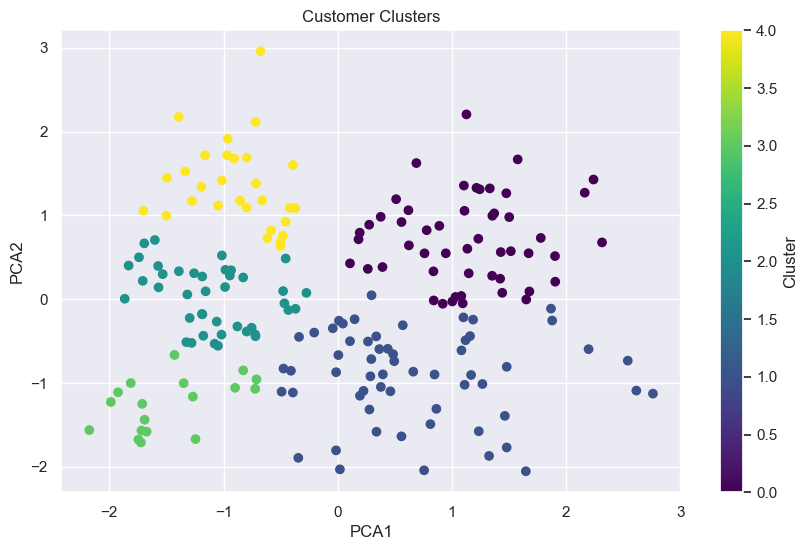

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['PCA1'], clean_data['PCA2'], c=y, cmap='viridis', marker='o')
plt.title('Customer Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()